In [1]:
import netCDF4 as nc
dataset = nc.Dataset('../dataset/QBO/daily_QBO/qbo_1979.nc')  # 替换为您的nc文件路径
dataset, type(dataset)

(<class 'netCDF4.Dataset'>
 root group (NETCDF4 data model, file format HDF5):
     dimensions(sizes): time(365), level(37)
     variables(dimensions): int32 time(time), float64 level(level), float32 u(time, level)
     groups: ,
 netCDF4._netCDF4.Dataset)

In [3]:
import pandas as pd
start_date = pd.to_datetime("1979/01/01", format="%Y/%m/%d")
end_date = pd.to_datetime("2021-06-01", format="%Y-%m-%d")
end_time = start_date + pd.Timedelta(days=13217+1453)
days_difference = (end_date - start_date).days
#end_time.strftime("%Y-%m-%d")
days_difference,end_time

(15492, Timestamp('2019-03-02 00:00:00'))

In [10]:
14245,15492

0.9126308104161597

In [ ]:
def ind_to_time(i):
    start_date = pd.to_datetime("1979/01/01", format="%Y/%m/%d")
    end_time = start_date + pd.Timedelta(days=i)
    end_time.strftime("%Y-%m-%d")

In [4]:
from netCDF4 import Dataset

# 打开 NetCDF 文件
file_path = '../dataset/QBO/daily_QBO/qbo_1979.nc'
data = Dataset(file_path)

# 查看文件结构
print(data)  # 打印文件信息
print(data.variables.keys())  # 查看所有变量
print(data.dimensions.keys())  # 查看所有维度

# 读取变量
time = data.variables['time'][:]  # 读取温度变量
level = data.variables['level'][:]  # 读取纬度
value = data.variables['u'][:]
# 关闭文件
data.close()

print(level)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(365), level(37)
    variables(dimensions): int32 time(time), float64 level(level), float32 u(time, level)
    groups: 
dict_keys(['time', 'level', 'u'])
dict_keys(['time', 'level'])
[   1.    2.    3.    5.    7.   10.   20.   30.   50.   70.  100.  125.
  150.  175.  200.  225.  250.  300.  350.  400.  450.  500.  550.  600.
  650.  700.  750.  775.  800.  825.  850.  875.  900.  925.  950.  975.
 1000.]


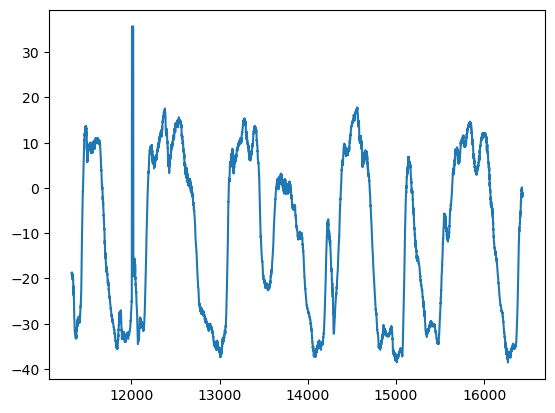

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

all_dfs = []
for i in range(1979,2024):
    file_path = '../dataset/QBO/daily_QBO/qbo_{0}.nc'.format(i)
    data = Dataset(file_path)
    value = data.variables['u'][:]
    data_mean_df = pd.DataFrame(value)
    data_mean_df.columns = [f'C{v:02d}' for v in range(data_mean_df.shape[1])]            
    all_dfs.append(data_mean_df)
combined_df = pd.concat(all_dfs, axis=0, ignore_index=True)
combined_df = combined_df.reset_index()  
#combined_df.to_csv('../dataset/QBO/daily_1979_2023_16436_37.csv', index=False, float_format='%.4f')
plt.plot(combined_df['C05'][11323:])

In [16]:
starts = 11323
combined_df_new = combined_df[starts:]
combined_df_new

,index,C00,C01,C02,C03,C04,C05,C06,C07,C08,...,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36
11323,11323,-40.768028,-10.870861,-5.886212,-5.464088,-7.649267,-18.768888,-34.334518,-23.623045,3.736114,...,-3.554603,-3.475312,-3.371831,-3.222787,-3.048931,-2.850814,-2.651374,-2.554355,-2.432989,-2.244385
11324,11324,-42.589890,-12.211437,-5.317765,-5.279294,-8.033858,-18.919838,-34.456127,-23.562897,3.766680,...,-3.827818,-3.796970,-3.711486,-3.537204,-3.272171,-2.988812,-2.753559,-2.631715,-2.480151,-2.258135
11325,11325,-40.197632,-12.654510,-5.863820,-5.016853,-7.093189,-19.115828,-34.541065,-23.502409,3.710026,...,-3.478818,-3.399796,-3.319357,-3.179756,-2.977604,-2.749968,-2.543792,-2.408326,-2.247965,-2.011661
11326,11326,-41.724075,-13.214520,-5.041546,-4.780966,-6.676708,-19.355032,-34.361355,-23.627270,3.664946,...,-3.244001,-3.161484,-3.040101,-2.862423,-2.655143,-2.453487,-2.284359,-2.186216,-2.048996,-1.807854
11327,11327,-42.938473,-13.095587,-5.549825,-5.504677,-6.633090,-18.706972,-34.394615,-23.719002,4.043413,...,-3.031690,-2.995666,-2.886594,-2.697471,-2.469265,-2.273258,-2.124908,-2.065330,-1.947580,-1.714856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,16431,-27.973879,-2.348408,-11.150390,-4.945115,2.710597,-0.919085,-32.617428,-27.542645,-12.679660,...,-2.859515,-2.764968,-2.670197,-2.555864,-2.424345,-2.294283,-2.182638,-2.124220,-2.023000,-1.865702
16432,16432,-30.230669,-2.829500,-11.520326,-6.375868,3.103552,-1.080643,-32.692360,-27.429499,-12.504786,...,-3.020887,-2.902376,-2.789506,-2.672088,-2.530498,-2.374038,-2.253471,-2.183882,-2.074227,-1.906462
16433,16433,-31.484154,-3.111979,-12.318372,-6.383423,2.898315,-1.772153,-32.698757,-27.283873,-12.490048,...,-2.945973,-2.829818,-2.742917,-2.677155,-2.601887,-2.491153,-2.375632,-2.259327,-2.109967,-1.971804
16434,16434,-35.005070,-3.032219,-13.656472,-7.415117,2.640263,-1.039768,-32.206882,-27.286009,-12.364523,...,-3.003469,-2.918747,-2.843326,-2.775118,-2.692799,-2.571514,-2.438164,-2.366676,-2.273365,-2.123885


(13180.0, 13880.0)

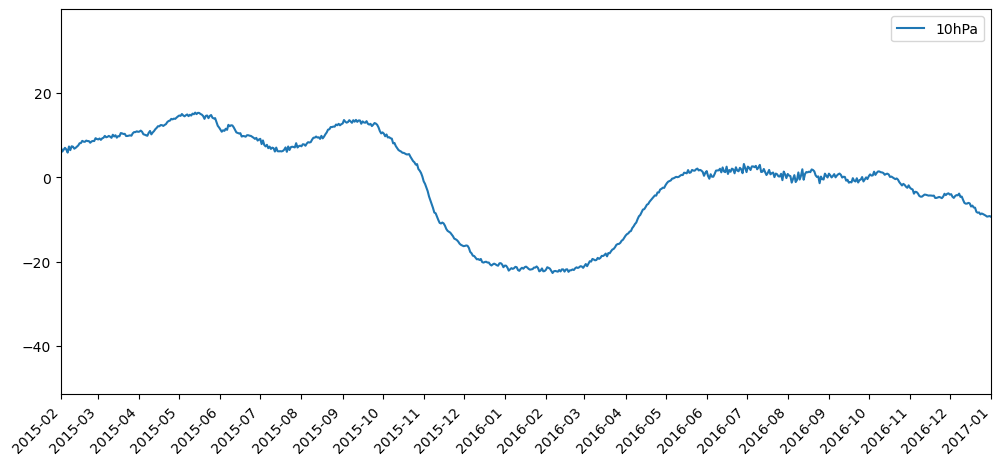

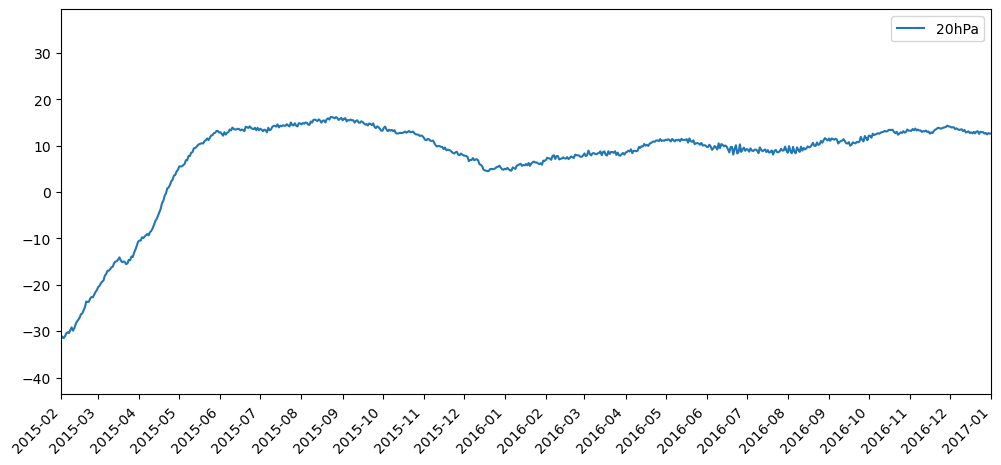

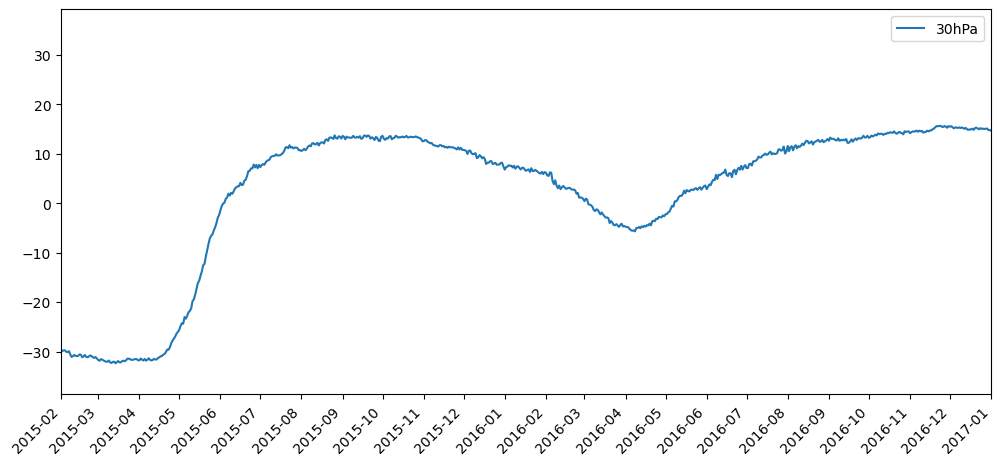

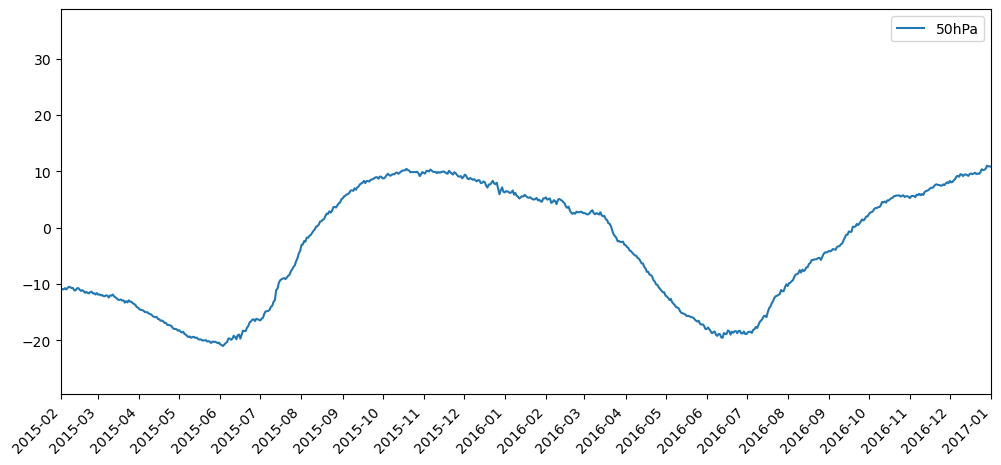

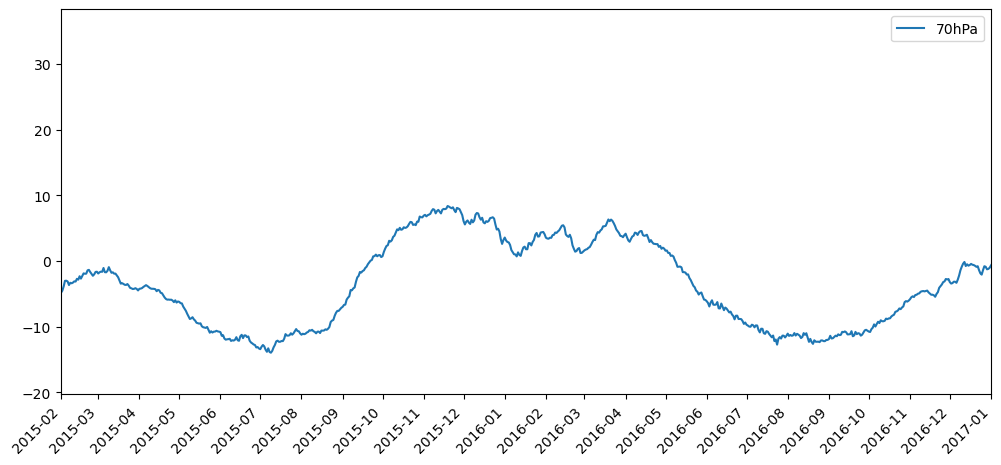

In [29]:
starts = 0
combined_df_new = combined_df[starts:]
n = 16436
max_i = n - 1

start_date = pd.to_datetime("1979-01-01")
end_date = start_date + pd.Timedelta(days=max_i)

init_date = pd.to_datetime("2015-02-01")
end_d = pd.to_datetime("2017-01-01")
start = (init_date - start_date).days
end = (end_d - start_date).days
if (end_d - init_date).days > 365 * 2:  # 超過2年用年刻度
    freq = 'YS'  # 年初
else:
    freq = 'MS'  # 月初

dates = pd.date_range(start=start_date, end=end_date, freq=freq)
ticks_pos = [(date - start_date).days for date in dates]
ticks_pos = [i for i in ticks_pos if i <= max_i]  # 過濾超出範圍的索引

labels = [date.strftime("%Y-%m") for date in dates if (date - start_date).days <= max_i]


plt.figure(figsize=(12,5))
plt.plot(combined_df_new['C05'], label='10hPa')
plt.xticks(ticks_pos, labels, rotation=45, ha='right')
plt.legend()
plt.xlim(start, end)
plt.figure(figsize=(12,5))
plt.plot(combined_df_new['C06'], label='20hPa')
plt.xticks(ticks_pos, labels, rotation=45, ha='right')
plt.legend()
plt.xlim(start, end)
plt.figure(figsize=(12,5))
plt.plot(combined_df_new['C07'], label='30hPa')
plt.xticks(ticks_pos, labels, rotation=45, ha='right')
plt.legend()
plt.xlim(start, end)
plt.figure(figsize=(12,5))
plt.plot(combined_df_new['C08'], label='50hPa')
plt.xticks(ticks_pos, labels, rotation=45, ha='right')
plt.legend()
plt.xlim(start, end)
plt.figure(figsize=(12,5))
plt.plot(combined_df_new['C09'], label='70hPa')
plt.xticks(ticks_pos, labels, rotation=45, ha='right')
plt.legend()
plt.xlim(start, end)

(14641.0, 15341.0)

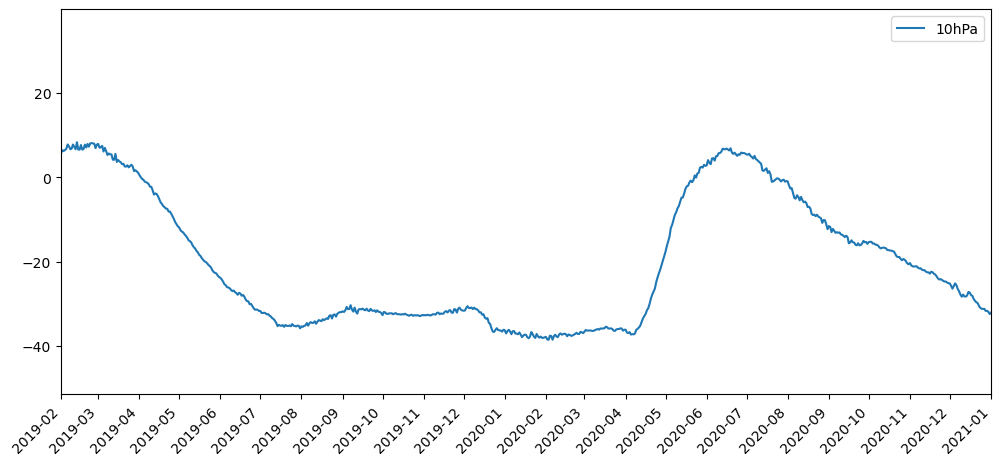

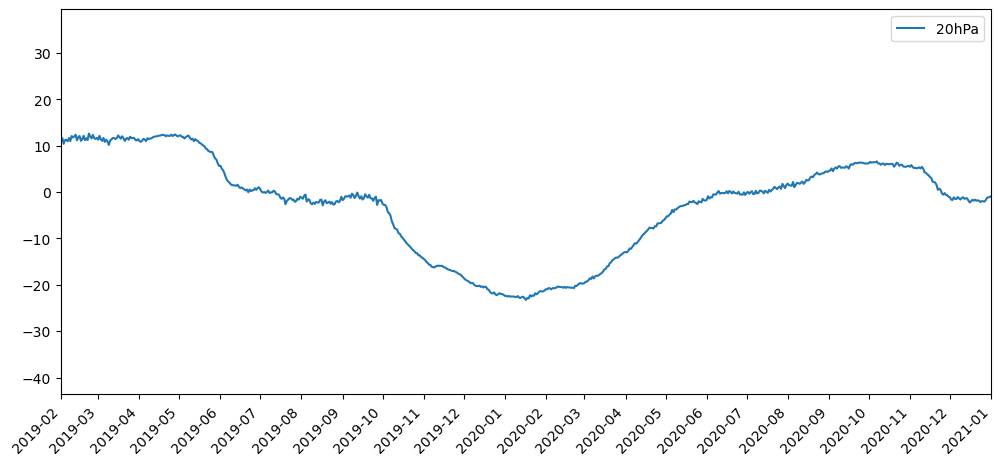

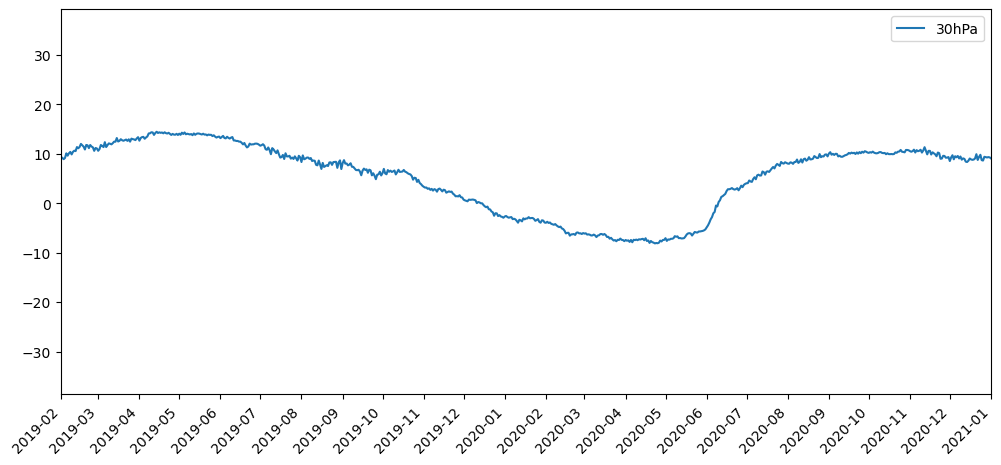

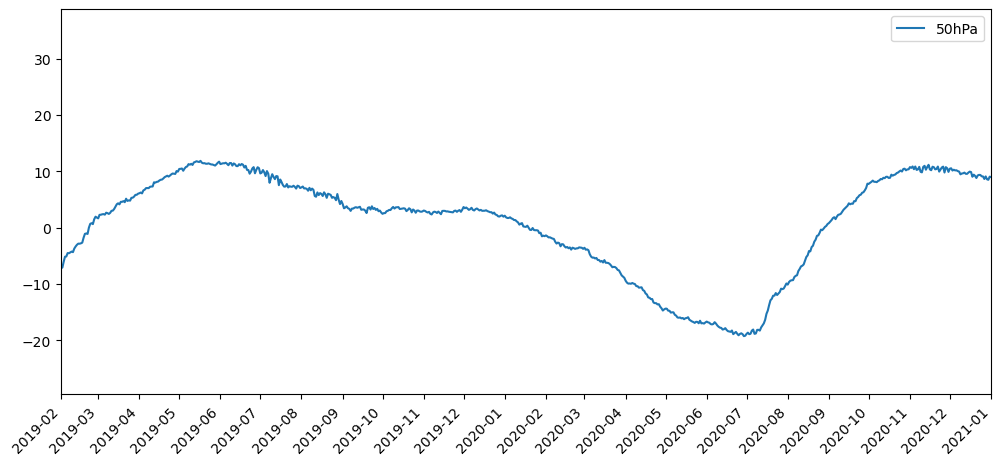

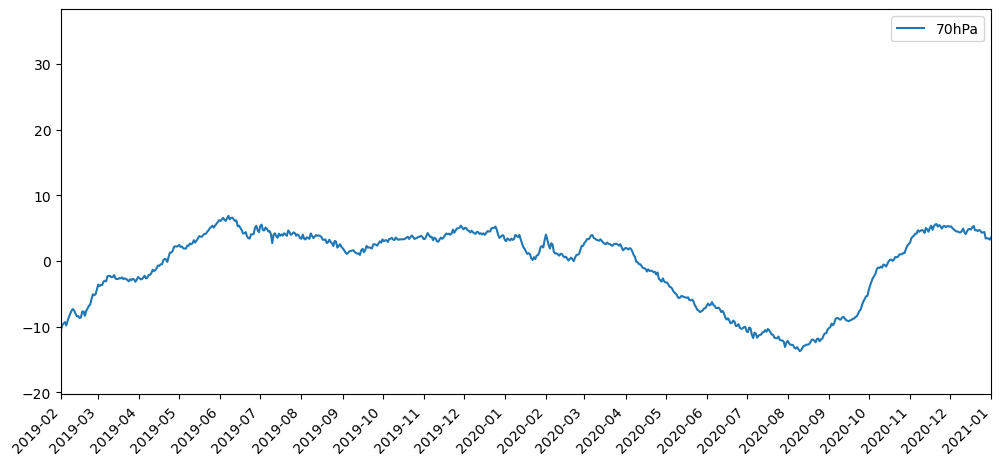

In [30]:
starts = 0
combined_df_new = combined_df[starts:]
n = 16436
max_i = n - 1

start_date = pd.to_datetime("1979-01-01")
end_date = start_date + pd.Timedelta(days=max_i)

init_date = pd.to_datetime("2019-02-01")
end_d = pd.to_datetime("2021-01-01")
start = (init_date - start_date).days
end = (end_d - start_date).days
if (end_d - init_date).days > 365 * 2:  # 超過2年用年刻度
    freq = 'YS'  # 年初
else:
    freq = 'MS'  # 月初

dates = pd.date_range(start=start_date, end=end_date, freq=freq)
ticks_pos = [(date - start_date).days for date in dates]
ticks_pos = [i for i in ticks_pos if i <= max_i]  # 過濾超出範圍的索引

labels = [date.strftime("%Y-%m") for date in dates if (date - start_date).days <= max_i]


plt.figure(figsize=(12,5))
plt.plot(combined_df_new['C05'], label='10hPa')
plt.xticks(ticks_pos, labels, rotation=45, ha='right')
plt.legend()
plt.xlim(start, end)
plt.figure(figsize=(12,5))
plt.plot(combined_df_new['C06'], label='20hPa')
plt.xticks(ticks_pos, labels, rotation=45, ha='right')
plt.legend()
plt.xlim(start, end)
plt.figure(figsize=(12,5))
plt.plot(combined_df_new['C07'], label='30hPa')
plt.xticks(ticks_pos, labels, rotation=45, ha='right')
plt.legend()
plt.xlim(start, end)
plt.figure(figsize=(12,5))
plt.plot(combined_df_new['C08'], label='50hPa')
plt.xticks(ticks_pos, labels, rotation=45, ha='right')
plt.legend()
plt.xlim(start, end)
plt.figure(figsize=(12,5))
plt.plot(combined_df_new['C09'], label='70hPa')
plt.xticks(ticks_pos, labels, rotation=45, ha='right')
plt.legend()
plt.xlim(start, end)

In [37]:
import numpy as np
import pandas as pd
data_mean = np.mean(value[:,:,320:-320], axis=2)
data_mean_arr = np.array(data_mean)
data_mean_arr = data_mean_arr.T
#data_final = data_mean_arr[::-1,:]
data_mean_df = pd.DataFrame(data_mean_arr.T)
data_mean_df.columns = [f'C{v:02d}' for v in range(data_mean_df.shape[1])]
data_mean_df = data_mean_df.reset_index()              
data_mean_df


,index,C00,C01,C02,C03,C04,C05,C06,C07,C08,...,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36
0,0,-57.619423,-21.635786,-1.402625,7.977250,-0.955713,-18.705347,-20.810345,-6.646878,2.069571,...,-2.437277,-2.578424,-2.724871,-2.879996,-3.029237,-3.124190,-3.130552,-3.032753,-2.828211,-2.612275
1,1,-15.274772,-16.861486,6.161314,12.469273,6.306921,-12.222104,-23.029852,-9.798491,0.136163,...,-2.996153,-3.125412,-3.252446,-3.379009,-3.487719,-3.544180,-3.519064,-3.375929,-3.117603,-2.858084
2,2,-9.319290,-4.430844,12.960602,17.862741,13.020308,1.311644,-24.289440,-12.312452,-0.813991,...,-1.907699,-2.030693,-2.152369,-2.274087,-2.388928,-2.474919,-2.507205,-2.429497,-2.256427,-2.077119
3,3,-19.662249,4.016117,20.662649,23.293522,18.950884,11.613250,-18.810730,-15.319258,-3.088508,...,-3.295357,-3.256999,-3.206154,-3.155979,-3.102445,-3.030500,-2.932975,-2.788105,-2.595890,-2.400625
4,4,-31.348177,0.112581,22.221941,24.875513,20.835808,15.808082,-1.610736,-16.660166,-8.912021,...,-3.345974,-3.271880,-3.206715,-3.154475,-3.105748,-3.053279,-2.984507,-2.868781,-2.690677,-2.489667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,-17.423695,5.440149,3.841013,-9.955066,-11.732445,2.021585,10.005467,6.837671,-13.793207,...,-2.991868,-2.945157,-2.887701,-2.834163,-2.792697,-2.768718,-2.743205,-2.705480,-2.592882,-2.426895
992,992,-7.596379,3.537161,-3.471614,-16.736317,-6.706057,6.219489,10.878005,9.772945,-1.523824,...,-2.758343,-2.637071,-2.543210,-2.478137,-2.440865,-2.428835,-2.418036,-2.405084,-2.304337,-2.139642
993,993,4.338645,2.434447,-7.742902,-16.996468,-1.813732,8.105230,11.788876,10.871818,5.605595,...,-3.297143,-3.188936,-3.048948,-2.890582,-2.758489,-2.668972,-2.577384,-2.500458,-2.390532,-2.235438
994,994,6.188721,-8.837424,-16.785942,-19.284227,-3.497013,7.316413,11.074703,11.091804,8.529018,...,-3.061954,-3.066782,-3.017705,-2.917188,-2.803008,-2.714410,-2.622154,-2.524884,-2.394276,-2.242075


In [38]:
data_mean_df.to_csv('../dataset/QBO/data_mean_996_37.csv', index=False, float_format='%.4f')

# data patch

In [49]:
import netCDF4 as nc
dataset = nc.Dataset('../dataset/QBO/u.mon.mean.ERA5.nc')
# 打开 NetCDF 文件
file_path = '../dataset/QBO/u.mon.mean.ERA5.nc'
data = Dataset(file_path)

# 查看文件结构
print(data)  # 打印文件信息
print(data.variables.keys())  # 查看所有变量
print(data.dimensions.keys())  # 查看所有维度

# 读取变量
time = data.variables['time'][:]  # 读取温度变量
level = data.variables['level'][:]  # 读取纬度
lat = data.variables['latitude'][:]  # 读取经度
value = data.variables['u'][:]
# 关闭文件
data.close()

data_try = np.array(value[:,:,320:-320])
data_try.shape

<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): time(996), level(37), latitude(721)
    variables(dimensions): float32 u(time, level, latitude), int32 time(time), int32 level(level), float32 latitude(latitude)
    groups: 
dict_keys(['u', 'time', 'level', 'latitude'])
dict_keys(['time', 'level', 'latitude'])


(996, 37, 81)

In [54]:
import numpy as np

# 假设 value 的形状是 (A, B, D)
A, B, D = data_try.shape
# 定义块的大小
length = 6  # 第一个维度的块大小
width = 3   # 第二个维度的块大小

# 计算块的数量
num_blocks_row = A // length
num_blocks_col = B // width

# 创建列表存储序列
sequences = []

for i in range(num_blocks_row):
    for j in range(num_blocks_col):
        # 取出当前块
        block = data_try[i*length:(i+1)*length, j*width:(j+1)*width, :]
        # 将块 reshape 成一维序列
        sequence = block.reshape(-1, 81)  # D - 640 是第三个维度的大小
        # 将序列添加到列表中
        sequences.append(sequence)

# 如果需要将所有序列合并成一个数组
data_patched = np.concatenate(sequences, axis=0)
data_patched.shape

(35856, 81)

In [55]:
data_mean_df = pd.DataFrame(data_patched)
data_mean_df.columns = [f'C{v:02d}' for v in range(data_mean_df.shape[1])]
data_mean_df = data_mean_df.reset_index()              
data_mean_df

,index,C00,C01,C02,C03,C04,C05,C06,C07,C08,...,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80
0,0,-75.150345,-74.959007,-74.756584,-74.542664,-74.316170,-74.076653,-73.823608,-73.556984,-73.276802,...,-40.739449,-40.146687,-39.552433,-38.956898,-38.359974,-37.761627,-37.161949,-36.560707,-35.957928,-35.353519
1,1,-49.463947,-48.904091,-48.327583,-47.734684,-47.125904,-46.501434,-45.862000,-45.208195,-44.540802,...,-2.001021,-1.646666,-1.308582,-0.987185,-0.683042,-0.396863,-0.128946,0.120086,0.349851,0.559899
2,2,-30.749247,-30.056559,-29.356064,-28.648327,-27.933693,-27.212255,-26.484346,-25.750383,-25.010513,...,17.690248,17.869350,18.029884,18.172094,18.296164,18.402130,18.490196,18.560263,18.612041,18.645494
3,3,-16.432407,-16.275803,-16.136633,-16.014500,-15.908969,-15.819469,-15.745213,-15.685269,-15.638496,...,-13.283386,-13.111271,-12.936072,-12.758080,-12.577521,-12.394365,-12.208623,-12.020278,-11.829374,-11.636351
4,4,-31.809326,-31.598589,-31.374079,-31.135014,-30.881376,-30.612745,-30.329660,-30.031864,-29.719479,...,-7.122468,-7.069834,-7.025257,-6.987644,-6.955996,-6.929505,-6.906569,-6.886397,-6.868111,-6.850907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35851,35851,-3.745327,-3.712519,-3.672916,-3.626619,-3.574725,-3.527928,-3.480990,-3.424044,-3.367190,...,-2.592396,-2.750641,-2.938331,-3.150233,-3.356305,-3.556220,-3.764979,-3.972968,-4.164490,-4.348103
35852,35852,-3.621221,-3.588610,-3.545847,-3.496432,-3.452023,-3.412896,-3.368453,-3.315112,-3.263143,...,-2.384336,-2.527599,-2.698152,-2.887657,-3.063100,-3.233206,-3.417513,-3.601402,-3.773984,-3.939718
35853,35853,-2.536341,-2.477923,-2.411344,-2.349276,-2.300447,-2.264402,-2.228704,-2.188778,-2.154137,...,-5.276399,-5.426352,-5.571342,-5.718108,-5.863243,-6.002483,-6.144319,-6.284419,-6.402625,-6.516524
35854,35854,-2.679173,-2.623561,-2.559687,-2.495805,-2.446329,-2.415385,-2.383052,-2.335160,-2.286512,...,-4.854150,-4.999007,-5.139651,-5.279959,-5.411827,-5.538707,-5.668004,-5.797666,-5.909506,-6.011194


In [56]:
data_mean_df.to_csv('../dataset/QBO/data_mean_6_3_81.csv', index=False, float_format='%.4f')